In [3]:

import numpy as np

import salvus.namespace as sn

import salvus.mesh
import salvus.mesh.layered_meshing as lm
from my_code.utilities import *
from pathlib import Path
import matplotlib.pyplot as plt

# Directories in WSL
PROJECT_DIR = '/home/oliver/workspace/Salvus/elastic_model/anisotropic/Project'
IMAGE_DIR = '/home/oliver/workspace/Salvus/elastic_model/anisotropic/image'
DATA_DIR = '/home/oliver/workspace/Salvus/elastic_model/anisotropic/data'


# Directories in Windows
PROJECT_DIR_WIN = '/mnt/d/Salvus_project/elastic_model/anisotropic/Project'
DATA_DIR_WIN = '/mnt/d/Salvus_project/elastic_model/anisotropic/data'
IMAGE_DIR_WIN = '/mnt/d/Salvus_project/elastic_model/anisotropic/image'

# salvus site 
SITE_NAME = "oliver_wsl"
RANKS = 8

# number of grains
N_GRAIN = 5

# center frequency 
CENTRAL_FREQUENCY = 2e6  # MHz


N_GRAIN = 5


roi_radius = 9e-3

n_txs = 16


VP = 5000.0
VS = 3000.0
RHO = 2600.0


x0, x1 = 0.0, 0.02
y0, y1 = 0.0, 0.02

time_ratio = 6
end_time = x1 / VP * time_ratio

smoothing = 0

# project name (folder's name)
# PROJECT_NAME = fr"tomography_solid_heterogeneous_grain_{N_GRAIN}"
# project name (folder's name)
# PROJECT_NAME = fr"tomography_solid_heterogeneous_roi_{int(roi_radius*1e3)}mm_tx_{n_txs}_smooth_{smoothing}_timeratio_{int(time_ratio)}"

# PROJECT_NAME = fr"tomography_solid_heterogeneous_grain_{N_GRAIN}_smooth_{smoothing}"

PROJECT_NAME = fr"tomography_solid_heterogeneous_roi_{int(roi_radius*1e3)}mm_tx_{n_txs}_smooth_{smoothing}_maxtime_{int(time_ratio)}"

# project name (folder's name)
# PROJECT_NAME = fr"tomography_solid_heterogeneous_roi_{int(roi_radius*1e3)}mm_tx_{n_txs}"
p =  sn.Project(path=Path(PROJECT_DIR_WIN, PROJECT_NAME))

Accordion(children=(HTML(value='\n                <head>\n                <style>\n                td {\n     …

In [4]:
event_data = p.waveforms.get("mesh_heterogeneous", p.events.list()[0])[0]

ed = event_data.get_waveform_data_xarray(receiver_field='displacement')



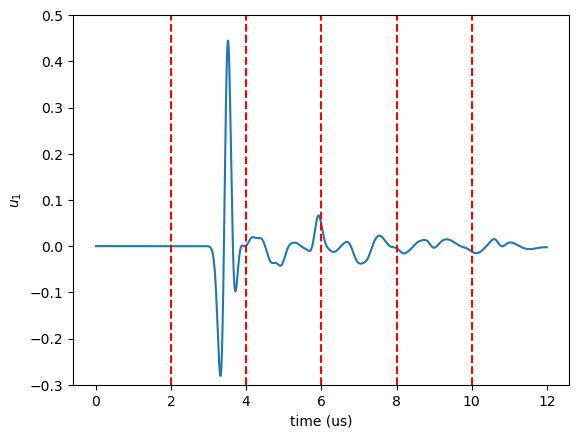

In [5]:
t = ed.time
rx_id = 15
idx = np.argmin(np.abs(t.values))

time = t.values[idx:]
data = ed.sel(component='X').values[rx_id][idx:] 
plt.plot(time*1e6, data)
plt.xlabel('time (us)')
plt.ylabel(fr'$u_1$')
plt.ylim([-0.3, 0.5])
plt.vlines(x=2,ymin=-0.3, ymax=0.5, color="red", linestyle="--")
plt.vlines(x=4,ymin=-0.3, ymax=0.5, color="red", linestyle="--")
plt.vlines(x=6,ymin=-0.3, ymax=0.5, color="red", linestyle="--")
plt.vlines(x=8,ymin=-0.3, ymax=0.5, color="red", linestyle="--")
plt.vlines(x=10,ymin=-0.3, ymax=0.5, color="red", linestyle="--")

plt.savefig(Path(IMAGE_DIR_WIN, PROJECT_NAME + fr'time_duration.png'))


In [6]:
# # Lastly we perform two iterations, and have a look at the results.
# for i in range(10):
    
#     p.inversions.iterate(
#         inverse_problem_configuration="inversion_L2",
#         timeout_in_seconds=360,
#         ping_interval_in_seconds=100,
#         delete_disposable_files="all",
#     )
    


In [7]:
p.viz.nb.inversion(inverse_problem_configuration="inversion_L2")

In [8]:
# inverted mesh 
mesh = p.inversions.get_model(inverse_problem_configuration="inversion_L2", iteration_id=9)
mesh.attach_field('v_p', mesh.element_nodal_fields['VP']*5000+5000)
# init mesh
init_mesh = p.simulations.get_mesh(simulation_configuration='mesh_heterogeneous')
rmse = np.sqrt(np.mean((mesh.element_nodal_fields['v_p'] - init_mesh.elemental_fields['VP'])**2))
rmse

25.700657

In [9]:
p.viz.nb.simulation_setup(
    simulation_configuration='mesh_heterogeneous',
    events=p.events.list(),
)


In [10]:
np.sqrt(mesh.number_of_elements)

95.99479152537391

In [11]:
np.sqrt(mesh.number_of_elements)

95.99479152537391

In [12]:

# # Get the connectivity array (which maps elements to global nodes)
# connectivity = init_mesh.connectivity  # shape (940, 4), each row = global node indices of one element

# # Initialize nodal field and count arrays
# n_nodes = init_mesh.number_of_nodes
# nodal_values = np.zeros(n_nodes)
# nodal_counts = np.zeros(n_nodes)

# # Loop through elements and distribute values to nodes
# for element_idx in range(connectivity.shape[0]):
#     for local_node_idx in range(4):  # assuming quad elements
#         global_node_idx = connectivity[element_idx, local_node_idx]
#         nodal_values[global_node_idx] += init_mesh.element_nodal_fields['VP'][element_idx, local_node_idx]
#         nodal_counts[global_node_idx] += 1

# # Avoid divide by zero
# nodal_counts[nodal_counts == 0] = 1
# true_nodal_field = nodal_values / nodal_counts  # now shape (n_nodes,)

# import matplotlib.pyplot as plt
# import numpy as np

# # Get nodal coordinates
# coordinates = init_mesh.points  # shape: (n_nodes, 2) if 2D

# # If you've already computed `true_nodal_field`:
# x = coordinates[:, 0]
# y = coordinates[:, 1]
# field = true_nodal_field

# # Plot
# plt.figure(figsize=(8, 6))
# sc = plt.scatter(x, y, c=field, cmap='viridis', s=10)
# plt.colorbar(sc, label='v_p (m/s)')
# plt.xlabel('x')
# plt.ylabel('y')
# plt.title('2D Plot of Nodal Field v_p')
# plt.axis('equal')
# plt.tight_layout()
# plt.show()


In [13]:
init_mesh

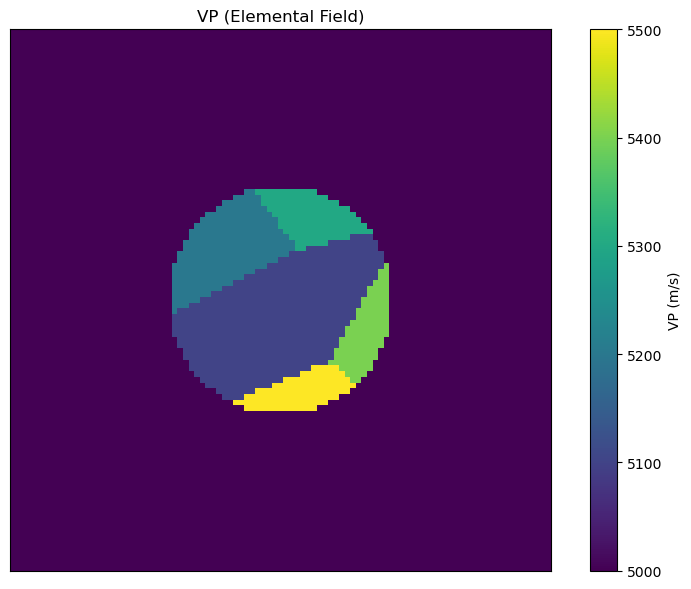

In [ ]:

import matplotlib.pyplot as plt
import numpy as np



nx, ny = int(np.sqrt(mesh.number_of_elements))+2, int(np.sqrt(mesh.number_of_elements))
vp_field_init = np.mean(init_mesh.elemental_fields['VP'], axis=1)
vp_grid_init = vp_field_init.reshape((ny, nx))

x_edges = np.linspace(0, 1, nx+1)
y_edges = np.linspace(0, 1, ny+1)

# Create high-resolution figure
fig, ax = plt.subplots(figsize=(8, 6), dpi=100)

# Plot with thicker lines
pc = ax.pcolormesh(x_edges, y_edges, vp_grid_init, cmap="viridis",
                   edgecolors='white', linewidth=0, rasterized=True)  # Thicker grid lines

# Colorbar
cbar = plt.colorbar(pc, ax=ax)
cbar.set_label("VP (m/s)")

# Hide all ticks and labels
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])

# Keep square aspect and clean layout
ax.set_aspect("equal")
plt.title("VP (Elemental Field)")
plt.tight_layout()
plt.savefig(Path(IMAGE_DIR_WIN, PROJECT_NAME + fr'_init.png'))

plt.show()


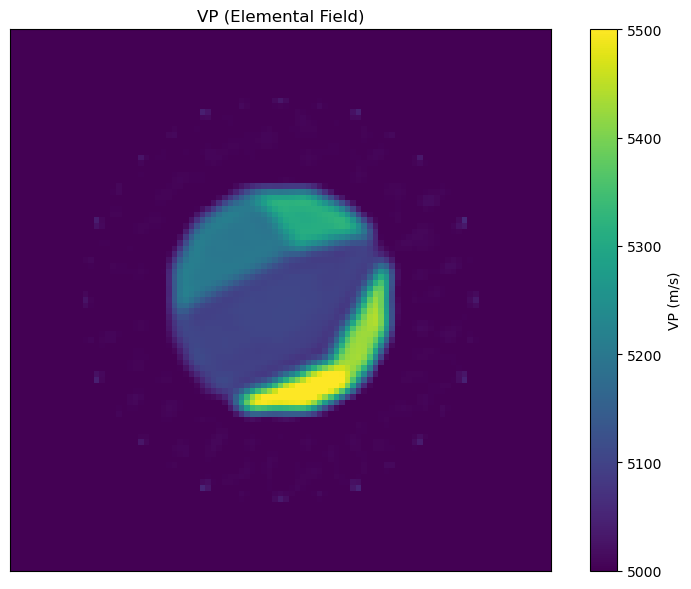

In [ ]:


vp_field = np.mean(mesh.elemental_fields['v_p'], axis=1)
vp_grid = vp_field.reshape((ny, nx))

x_edges = np.linspace(0, 1, nx+1)
y_edges = np.linspace(0, 1, ny+1)

# Create high-resolution figure
fig, ax = plt.subplots(figsize=(8, 6), dpi=100)

# Plot with thicker lines
pc = ax.pcolormesh(x_edges, y_edges, vp_grid, cmap="viridis",
                   edgecolors='white', linewidth=0, rasterized=True)  # Thicker grid lines

# Colorbar
cbar = plt.colorbar(pc, ax=ax)
cbar.set_label("VP (m/s)")

# Hide all ticks and labels
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])
pc.set_clim(vmin=5000, vmax=5500)  # Set colorbar limits

# Keep square aspect and clean layout
ax.set_aspect("equal")
plt.title("VP (Elemental Field)")
plt.tight_layout()
plt.savefig(Path(IMAGE_DIR_WIN, PROJECT_NAME + fr'_inverted.png'))
plt.show()


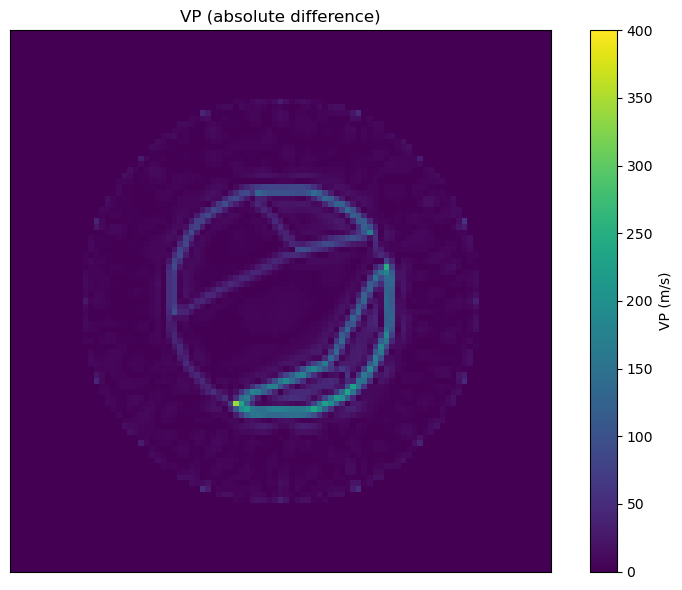

In [ ]:
vp_diff = abs(vp_grid - vp_grid_init)

x_edges = np.linspace(0, 1, nx+1)
y_edges = np.linspace(0, 1, ny+1)

# Create high-resolution figure
fig, ax = plt.subplots(figsize=(8, 6), dpi=100)

# Plot with thicker lines
pc = ax.pcolormesh(x_edges, y_edges, vp_diff, cmap="viridis",
                   edgecolors='white', linewidth=0, rasterized=True)  # Thicker grid lines

# Colorbar
cbar = plt.colorbar(pc, ax=ax)
cbar.set_label("VP (m/s)")

# Hide all ticks and labels
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])
pc.set_clim(vmin=0, vmax=400)  # Set colorbar limits

# Keep square aspect and clean layoutplt
ax.set_aspect("equal")
plt.title("VP (absolute difference)")
plt.tight_layout()
plt.savefig(Path(IMAGE_DIR_WIN, PROJECT_NAME + fr'_abs_diff.png'))
plt.show()


In [ ]:
rmse = np.sqrt(np.mean((vp_grid - vp_grid_init)**2))
rmse

21.951292

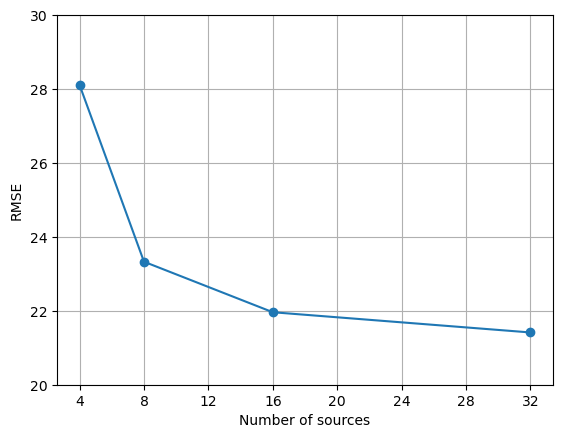

In [ ]:
rmse_ls = np.array([28.11044, 23.327965, 21.961243, 21.413898])
rmse_node_ls = np.array([28.11044, 23.327965, 21.961243, 21.413898])
x_ls = [4, 8, 16, 32]

plt.plot(x_ls, rmse_node_ls, marker='o')
plt.xlabel('Number of sources')
plt.ylabel('RMSE')
plt.grid(True)
plt.ylim([20,30])
plt.xticks(range(4, 33, 4))  # Ticks at 4, 8, 12, 16, 20, 24, 28, 32
plt.savefig(Path(IMAGE_DIR_WIN,  fr'elemental_field_rmse.png'))


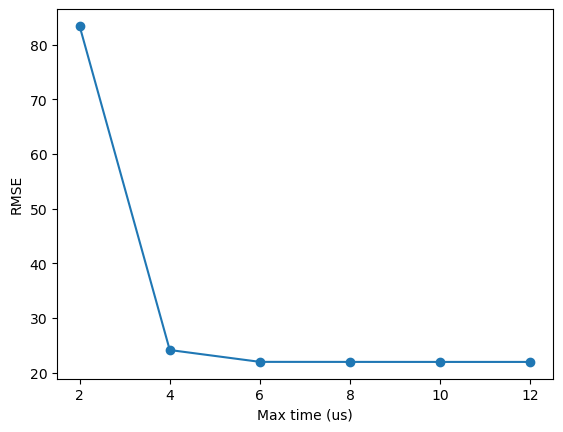

In [ ]:
rmse_node_ls = np.array([83.433365 ,24.130592, 21.961243, 21.954731, 21.951113, 21.951292])
x_ls = [2 ,4 ,6, 8, 10, 12]

plt.plot(x_ls, rmse_node_ls, marker='o')
plt.xlabel('Max time (us)')
plt.ylabel('RMSE')
# plt.grid(True)
plt.xticks([2 ,4 ,6, 8, 10, 12])  # Ticks at 4, 8, 12, 16, 20, 24, 28, 32
plt.savefig(Path(IMAGE_DIR_WIN,  fr'max_time_rmse.png'))